<a href="https://colab.research.google.com/github/shindekalpesh/association-rule-mining/blob/main/Apriori_MBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
from google.colab import files

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori, association_rules

uploaded = files.upload()

Saving MBA_Data.xlsx to MBA_Data.xlsx


In [17]:
# Importing the dataset into variable called df:

df = pd.read_excel(io.BytesIO(uploaded.get('MBA_Data.xlsx')))

In [18]:
# Checking first 5 rows:

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [19]:
# Checking the dimensions:

df.shape

(541909, 8)

In [20]:
# Checking the info of the columns:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [21]:
# Checking for null values:

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [22]:
# df[df.isnull().any(axis=1)]

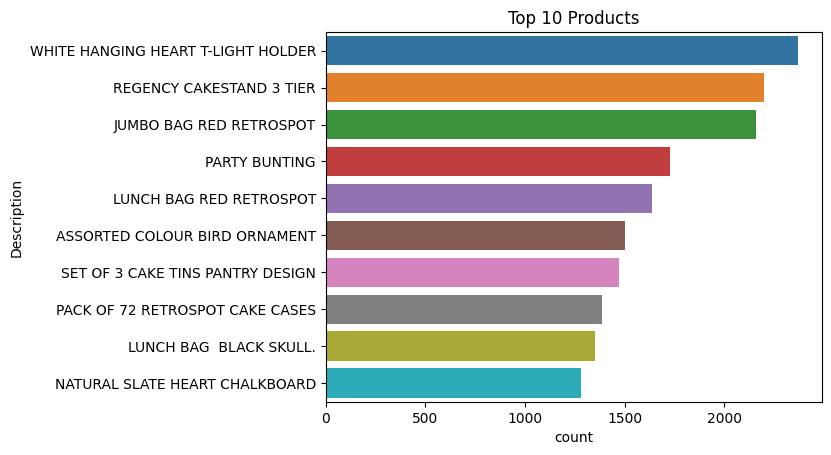

In [35]:
sns.countplot(y = 'Description', data = df, order = df['Description'].value_counts().iloc[:10].index)
plt.title("Top 10 Products",)
plt.show()

In [24]:
# Tidying the product names:
df['Description'] = df['Description'].str.strip()
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [25]:
basket = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

In [26]:
basket

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C581484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C581490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C581499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
#one hot encode the basket
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.head()

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# ### Run apriori algorithm on frequent item sets (items that frequently appear in the same basket)

#create minTransactions variable to represent the minimum number of baskets for support parameter
minTransaction = 200
totalTransactions = len(basket_sets.index)
min_support_calc = minTransaction/totalTransactions

print('number of baskets for analysis is ', totalTransactions)
print('minimum support value is ', round(min_support_calc*100, 4), '%')

number of baskets for analysis is  24445
minimum support value is  0.8182 %


In [29]:
#create frequent items sets with calculated minimum support
frequent_itemsets = apriori(basket_sets, min_support=min_support_calc, use_colnames=True)
frequent_itemsets.describe()

,support
count,1904.000000
mean,0.013598
std,0.007806
min,0.008182
25%,0.009123
50%,0.010922
75%,0.014809
max,0.092452


In [30]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
119,(BEADED CRYSTAL HEART PINK ON STICK),(DOTCOM POSTAGE),0.008427,0.028963,0.008223,0.975728,33.688806,0.007978,40.006725
1904,"(JAM MAKING SET PRINTED, SUKI SHOULDER BAG)",(DOTCOM POSTAGE),0.008918,0.028963,0.008550,0.958716,33.101416,0.008292,23.520675
2096,"(HERB MARKER THYME, HERB MARKER PARSLEY)",(HERB MARKER ROSEMARY),0.008713,0.009818,0.008304,0.953052,97.072281,0.008219,21.090877
2090,"(HERB MARKER THYME, HERB MARKER BASIL)",(HERB MARKER ROSEMARY),0.008591,0.009818,0.008182,0.952381,97.003968,0.008097,20.793823
3051,"(REGENCY TEA PLATE ROSES, REGENCY TEA PLATE PINK)",(REGENCY TEA PLATE GREEN),0.011004,0.015586,0.010432,0.947955,60.820917,0.010260,18.914812
2098,"(HERB MARKER PARSLEY, HERB MARKER ROSEMARY)",(HERB MARKER THYME),0.008795,0.009695,0.008304,0.944186,97.386616,0.008219,17.742960
2092,"(HERB MARKER BASIL, HERB MARKER ROSEMARY)",(HERB MARKER THYME),0.008754,0.009695,0.008182,0.934579,96.395757,0.008097,15.137516
532,(HERB MARKER THYME),(HERB MARKER ROSEMARY),0.009695,0.009818,0.009041,0.932489,94.977936,0.008946,14.667071
3076,"(WOODEN HEART CHRISTMAS SCANDINAVIAN, WOODEN T...",(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.010186,0.020945,0.009450,0.927711,44.292757,0.009236,13.543594
533,(HERB MARKER ROSEMARY),(HERB MARKER THYME),0.009818,0.009695,0.009041,0.920833,94.977936,0.008946,12.509113


In [31]:
### Save results to csv file based on desired association parameters

In [32]:
rules[(rules['lift'] >= 1.4) & (rules['confidence'] >= 0.3)].sort_values(by=['confidence', 'lift'], ascending=False).to_excel(r'C:\Downloads\Online_Retail_Results.xlsx', index=False)

In [33]:
rules[(rules['lift'] >= 1.4) & (rules['confidence'] >= 0.3)].sort_values(by=['confidence', 'lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
119,(BEADED CRYSTAL HEART PINK ON STICK),(DOTCOM POSTAGE),0.008427,0.028963,0.008223,0.975728,33.688806,0.007978,40.006725
1904,"(JAM MAKING SET PRINTED, SUKI SHOULDER BAG)",(DOTCOM POSTAGE),0.008918,0.028963,0.008550,0.958716,33.101416,0.008292,23.520675
2096,"(HERB MARKER THYME, HERB MARKER PARSLEY)",(HERB MARKER ROSEMARY),0.008713,0.009818,0.008304,0.953052,97.072281,0.008219,21.090877
2090,"(HERB MARKER THYME, HERB MARKER BASIL)",(HERB MARKER ROSEMARY),0.008591,0.009818,0.008182,0.952381,97.003968,0.008097,20.793823
3051,"(REGENCY TEA PLATE ROSES, REGENCY TEA PLATE PINK)",(REGENCY TEA PLATE GREEN),0.011004,0.015586,0.010432,0.947955,60.820917,0.010260,18.914812
...,...,...,...,...,...,...,...,...,...
465,(PLEASE ONE PERSON METAL SIGN),(HAND OVER THE CHOCOLATE SIGN),0.034567,0.027695,0.010391,0.300592,10.853714,0.009433,1.390183
668,(JUMBO BAG ALPHABET),(JUMBO BAG PINK POLKADOT),0.037063,0.049826,0.011127,0.300221,6.025366,0.009280,1.357819
1627,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER CUPS),0.040335,0.017509,0.012109,0.300203,17.145931,0.011403,1.403966
3196,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...","(JUMBO BAG BAROQUE BLACK WHITE, JUMBO BAG PIN...",0.027818,0.016936,0.008345,0.300000,17.713768,0.007874,1.404377
